<a href="https://www.kaggle.com/code/abinshaibnuayyoob/used-car-auction?scriptVersionId=191513539" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [79]:
'''we are trying to get following insights from this dataset
1) what car is most in demand amoung the used cars
2) relation of condition and resale value(general trend)
3) price dependency on odometer
4) how related are the mode of transmission and selling price
5) dependency of selling price on age of car
6) what are some most expensive cars. '''

'we are trying to get following insights from this dataset\n1) what car is most in demand amoung the used cars\n2) relation of condition and resale value(general trend)\n3) price dependency on odometer\n4) how related are the mode of transmission and selling price\n5) dependency of selling price on age of car\n6) what are some most expensive cars. '

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/kaggle/input/used-car-auction-prices/car_prices.csv',on_bad_lines='skip')
df.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


In [ ]:
df.shape

In [ ]:
df.isnull().sum()

In [ ]:
df[df.isnull()>2]

In [4]:
df.drop('vin',axis=1,inplace=True)

In [5]:
df_copy=df

In [6]:
df['year'].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000, 1999, 1998, 1995, 1996, 1997, 1987,
       1994, 1993, 1992, 1989, 1991, 1990, 1986, 1985, 1988, 1984, 1982,
       1983])

In [7]:
states=df['state'].unique()
states

array(['ca', 'tx', 'pa', 'mn', 'az', 'wi', 'tn', 'md', 'fl', 'ne', 'nj',
       'nv', 'oh', 'mi', 'ga', 'va', 'sc', 'nc', 'in', 'il', 'co', 'ut',
       'mo', 'ny', 'ma', 'pr', 'or', 'la', 'wa', 'hi', 'qc', 'ab', 'on',
       'ok', 'ms', 'nm', 'al', 'ns'], dtype=object)

In [ ]:
#lets make the state names to uppercase

In [15]:
df['state']=df['state'].apply(str.upper)
df['state'].unique()

array(['CA', 'TX', 'PA', 'MN', 'AZ', 'WI', 'TN', 'MD', 'FL', 'NE', 'NJ',
       'NV', 'OH', 'MI', 'GA', 'VA', 'SC', 'NC', 'IN', 'IL', 'CO', 'UT',
       'MO', 'NY', 'MA', 'PR', 'OR', 'LA', 'WA', 'HI', 'QC', 'AB', 'ON',
       'OK', 'MS', 'NM', 'AL', 'NS'], dtype=object)

In [16]:
df[(df['odometer'].isnull())&(df['sellingprice'].isnull())].count()


year            0
make            0
model           0
trim            0
body            0
transmission    0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

/tmp/ipykernel_32/178632193.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['odometer'])


<Axes: xlabel='odometer', ylabel='Density'>

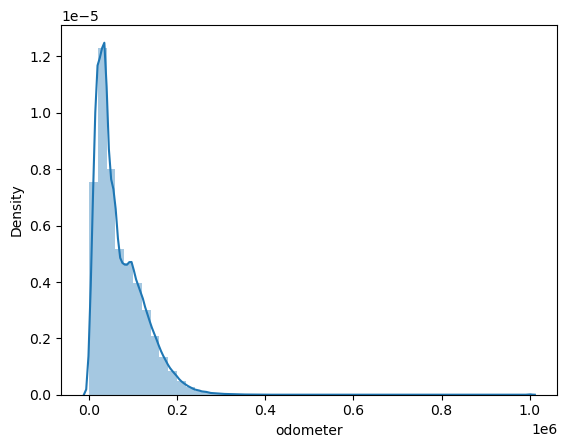

In [17]:
sns.distplot(df['odometer'])

In [ ]:
#since it is a skewed distribution lets change the x axis to log values and observe.

/tmp/ipykernel_32/3173873977.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['odometer'])


<Axes: xlabel='odometer', ylabel='Density'>

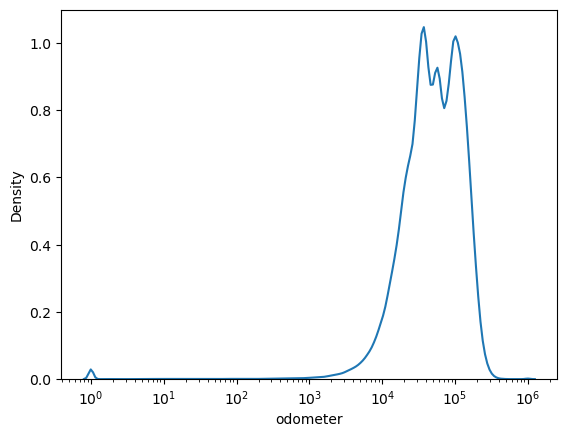

In [18]:
plt.figure()
plt.xscale('log')
sns.distplot(df['odometer'])


In [19]:
'''we can see most of the values came around tenthousands and 1-2 lacks.there are
some probable outliers also.like 1, 999999. since the distribution is "not at all" 
gaussian, lets check wheather z score methode is applicable here anyways.'''

'we can see most of the values came around tenthousands and 1-2 lacks.there are\nsome probable outliers also.like 1, 999999. since the distribution is "not at all" \ngaussian, lets check wheather z score methode is applicable here anyways.'

In [20]:
df['odometer'].describe()

count    558717.000000
mean      68323.195797
std       53397.752933
min           1.000000
25%       28374.000000
50%       52256.000000
75%       99112.000000
max      999999.000000
Name: odometer, dtype: float64

In [21]:
std=np.std(df['odometer'])
mean=np.mean(df['odometer'])
std,mean

(53397.70514729636, 68323.19579679874)

In [22]:
(3*std)+mean,(3*std)-2*mean

(228516.3112386878, 23546.723848291585)

In [23]:
df[(df['odometer']<(3*std)+mean)&(df['odometer']>(3*std)-mean)].count()

year            153868
make            147933
model           147933
trim            147753
body            146114
transmission    137923
state           153868
condition       146190
odometer        153868
color           153765
interior        153765
seller          153868
mmr             153868
sellingprice    153868
saledate        153868
dtype: int64

In [24]:
'''since the higher values in odometer effect the mean value,lets consider applying
modified zscore here.(ie, by taking median absolute deviation)'''

'since the higher values in odometer effect the mean value,lets consider applying\nmodified zscore here.(ie, by taking median absolute deviation)'

In [25]:
np.median(df['odometer'])

nan

In [26]:
df.dropna(subset='odometer',inplace=True)

In [27]:
df['odometer'].isnull().sum()

0

In [28]:
median=np.median(df['odometer'])
median

52256.0

In [29]:
median_deviation=[]
for i in df['odometer']:
    median_dev= abs(median-i)
    median_deviation.append(median_dev)

mad=np.median(median_deviation)
mad
    

30474.0

In [ ]:
'''for modified zscore we generally consider z=3.5

In [30]:
df[(df['odometer']>((3.5*mad)/0.6745)-median)&(df['odometer']<((3.5*mad)/0.6745)+median)].count()


year            114303
make            109671
model           109671
trim            109543
body            108230
transmission    102267
state           114303
condition       108156
odometer        114303
color           114226
interior        114226
seller          114303
mmr             114303
sellingprice    114303
saledate        114303
dtype: int64

In [31]:
 (114303/558717)*100


20.45812101654326

In [32]:
df2=df
df2.shape

(558717, 15)

In [33]:
df2[df2['odometer']<500].sort_values(by=['condition'],ascending=False)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
37,2014,BMW,3 Series,328i SULEV,Sedan,automatic,CA,5.0,111.0,black,—,financial services remarketing (lease),32200,30500,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
368795,2014,Ford,F-150,XLT,SuperCab,NaN,PA,5.0,46.0,black,gray,tdaf remarketing,26200,27600,Fri Feb 27 2015 01:00:00 GMT-0800 (PST)
344279,2015,Chevrolet,Corvette,Stingray,Coupe,automatic,TN,5.0,479.0,black,black,sullivan auto group llc,52500,54200,Wed Feb 25 2015 02:30:00 GMT-0800 (PST)
345122,2014,Kia,Soul,Base,Wagon,automatic,GA,5.0,339.0,white,black,kia motors finance,13750,14200,Thu Feb 26 2015 02:00:00 GMT-0800 (PST)
345224,2014,Toyota,4Runner,Limited,SUV,automatic,FL,5.0,396.0,gray,black,onesource/kendall toyota,40800,42800,Tue Feb 24 2015 01:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41285,1998,Mercedes-Benz,E-Class,E320,Sedan,automatic,FL,NaN,1.0,white,beige,jupiter auto exchange inc,2525,1200,Thu Dec 18 2014 09:50:00 GMT-0800 (PST)
41315,1995,Lexus,ES 300,Base,Sedan,NaN,TX,NaN,1.0,white,—,charitable adult rides services/car donating is,1725,300,Tue Dec 23 2014 00:00:00 GMT-0800 (PST)
41320,1996,Dodge,Intrepid,Base,Sedan,NaN,MO,NaN,1.0,burgundy,—,elite car sales west inc,550,175,Tue Dec 23 2014 11:00:00 GMT-0800 (PST)
41815,2014,BMW,M5,Base,Sedan,automatic,TX,NaN,1.0,white,black,hertz/tra,76000,35000,Tue Dec 23 2014 00:00:00 GMT-0800 (PST)


In [34]:
df2=df2[(df2['odometer']>5000)&(df2['odometer']<250000)]
df2.shape

(546836, 15)

**Odometer v/s selling price**

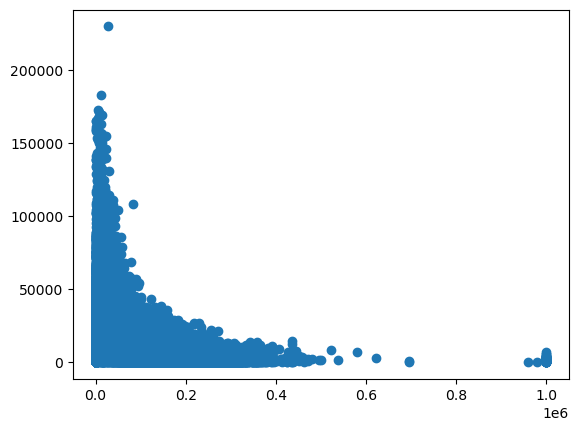

In [37]:
plt.scatter(x=df['odometer'],y=df['sellingprice'])

In [77]:
'''the selling price is getting lower as the odometer value increases. the minor increase in the selling 
price at the higher odometer values is for the vitage cars.'''

'the selling price is getting lower as the odometer value increases. the minor increase in the selling \nprice at the higher odometer values is for the vitage cars.'

In [53]:
#plt.scatter(x=df['odometer'],y=df['sellingprice'])
#plt.xticks(df['odometer'])

In [40]:
df['mmr'].describe()

count    558717.00000
mean      13770.79398
std        9679.55272
min          25.00000
25%        7100.00000
50%       12250.00000
75%       18300.00000
max      182000.00000
Name: mmr, dtype: float64

In [41]:
df[df['mmr']<500].count()

year            1955
make            1766
model           1766
trim            1757
body            1691
transmission    1686
state           1955
condition       1788
odometer        1955
color           1952
interior        1952
seller          1955
mmr             1955
sellingprice    1955
saledate        1955
dtype: int64

Text(0, 0.5, 'selling price')

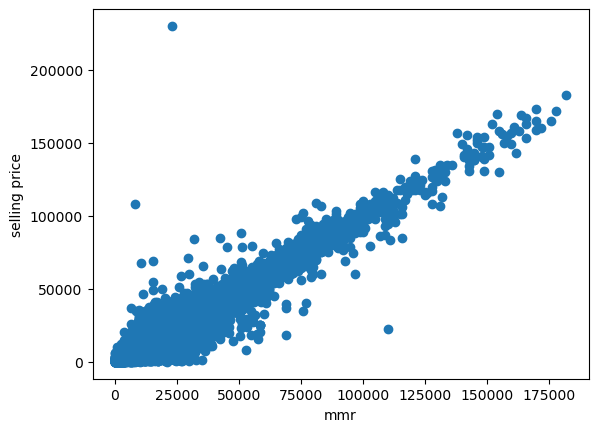

In [42]:
plt.scatter(df['mmr'],df['sellingprice'])
plt.xlabel('mmr')
plt.ylabel('selling price')

In [ ]:
'''there are some possible outliers in the figure. lets check them.'''

In [43]:
df[df['sellingprice']>180000]

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
344905,2014,Ford,Escape,Titanium,SUV,automatic,MO,4.3,27802.0,green,tan,ford-lincoln dealer program,22800,230000,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
548146,2011,Ferrari,458 Italia,Base,coupe,automatic,FL,4.6,12116.0,red,black,platinum motor cars,182000,183000,Wed Jun 17 2015 03:40:00 GMT-0700 (PDT)


In [44]:
df[(df['mmr']<25000)&(df['sellingprice']>50000)]

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
160201,2010,Ford,Escape,XLT,SUV,automatic,OH,3.7,82985.0,red,gray,pat obrien chevrolet south,8250,108200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
251360,2015,Chevrolet,Suburban,LTZ,SUV,automatic,TX,4.0,12710.0,white,gray,music city autoplex llc,15300,55000,Tue Jun 30 2015 08:00:00 GMT-0700 (PDT)
344905,2014,Ford,Escape,Titanium,SUV,automatic,MO,4.3,27802.0,green,tan,ford-lincoln dealer program,22800,230000,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
405315,2015,Toyota,Corolla,LE,Sedan,automatic,NJ,2.2,517.0,silver,gray,enterprise veh exchange/rental,15250,68900,Wed Mar 18 2015 02:30:00 GMT-0700 (PDT)
407508,2012,Nissan,Versa,1.8 S,Hatchback,automatic,FL,3.8,10926.0,white,black,nissan-infiniti lt,10350,67500,Thu Apr 16 2015 02:15:00 GMT-0700 (PDT)


In [45]:
df.drop(344905,inplace=True)

/tmp/ipykernel_32/4264451957.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sellingprice'])


<Axes: xlabel='sellingprice', ylabel='Density'>

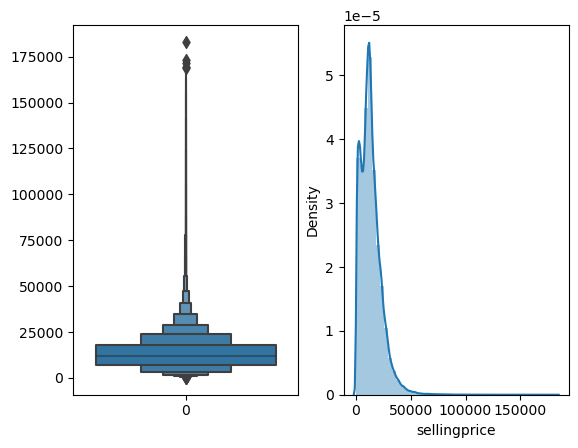

In [46]:

plt.subplot(1,2,1)
sns.boxenplot(df['sellingprice'])


plt.subplot(1,2,2)
sns.distplot(df['sellingprice'])


In [ ]:
'''from the above plots we can see the average sallingprice is 
around in a range of 12-14k. there are some cars in top price range.'''

In [ ]:
'''lets find what are the luxurious car brands in auction'''

In [47]:

luxury_brands=df['make'][df['sellingprice']>150000].unique()
luxury_brands

array(['Ferrari', 'Rolls-Royce', 'BMW', 'Bentley', 'Porsche',
       'Mercedes-Benz'], dtype=object)

**TRANSMISSION**

<Axes: xlabel='transmission', ylabel='count'>

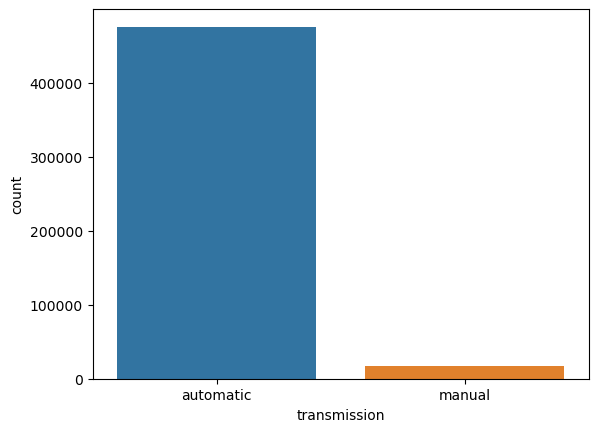

In [48]:
sns.countplot(x=df['transmission'])

In [49]:
df['transmission'].value_counts()

automatic    475857
manual        17537
Name: transmission, dtype: int64

<Axes: xlabel='transmission', ylabel='sellingprice'>

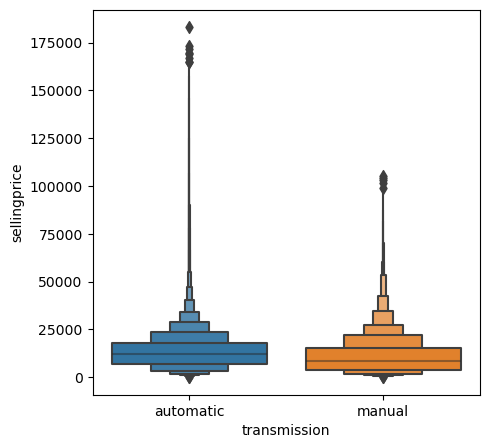

In [50]:
plt.figure(figsize=(5,5))

sns.boxenplot(x=df['transmission'],y=df['sellingprice'])

In [ ]:
'''From the above plots we can see that the automatic transmission cars
contribute more in numbers and also in top sales price. and average sales
price is bit high for automatic than manual transmission.'''

**car condition v/s selling price**

<Axes: xlabel='condition', ylabel='sellingprice'>

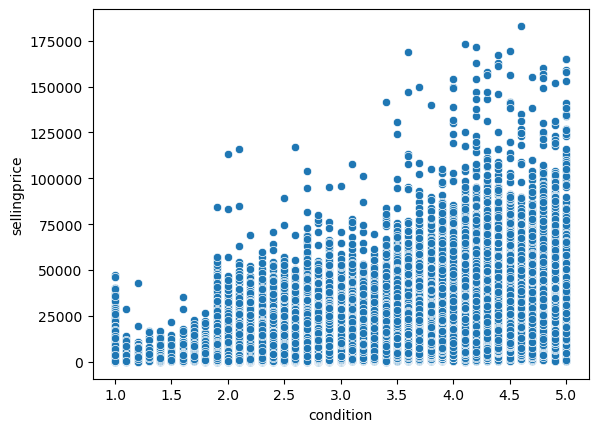

In [51]:
sns.scatterplot(x=df['condition'],y=df['sellingprice'])

In [ ]:
'''the plot shows as the condition of the car gets better, the 
selling price of the car gets higher. lets analyse the trend taking a 
single model made in same year. 
for instance lets take ford fusion in year 2012.'''

<Axes: xlabel='condition', ylabel='sellingprice'>

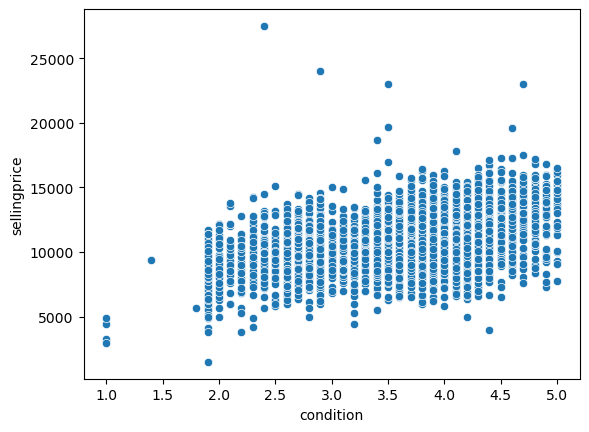

In [54]:
sns.scatterplot(x=df['condition'][(df['make']=='Ford')&(df['model']=='Fusion')&(df['year']==2012)],y=df['sellingprice'])

In [ ]:
'''here also we can see that for a same car of same year, as the condition
of the car gets better, the selling price also gets higher. condition and
sellingprice are directly propotional.'''

**Year v/s selling price**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, '1982'),
  Text(1, 0, '1983'),
  Text(2, 0, '1984'),
  Text(3, 0, '1985'),
  Text(4, 0, '1986'),
  Text(5, 0, '1987'),
  Text(6, 0, '1988'),
  Text(7, 0, '1989'),
  Text(8, 0, '1990'),
  Text(9, 0, '1991'),
  Text(10, 0, '1992'),
  Text(11, 0, '1993'),
  Text(12, 0, '1994'),
  Text(13, 0, '1995'),
  Text(14, 0, '1996'),
  Text(15, 0, '1997'),
  Text(16, 0, '1998'),
  Text(17, 0, '1999'),
  Text(18, 0, '2000'),
  Text(19, 0, '2001'),
  Text(20, 0, '2002'),
  Text(21, 0, '2003'),
  Text(22, 0, '2004'),
  Text(23, 0, '2005'),
  Text(24, 0, '2006'),
  Text(25, 0, '2007'),
  Text(26, 0, '2008'),
  Text(27, 0, '2009'),
  Text(28, 0, '2010'),
  Text(29, 0, '2011'),
  Text(30, 0, '2012'),
  Text(31, 0, '2013'),
  Text(32, 0, '2014'),
  Text(33, 0, '2015')])

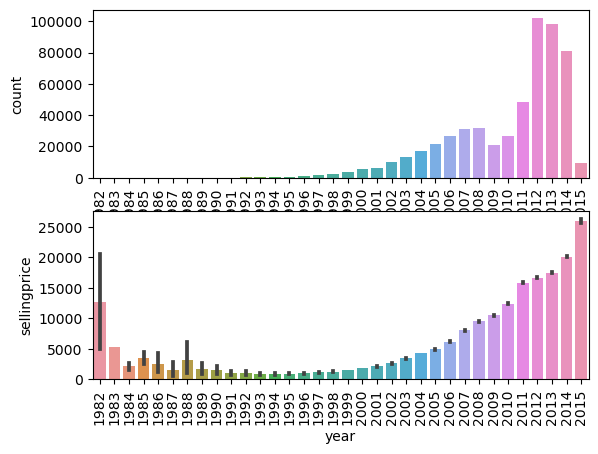

In [55]:
plt.subplot(2,1,1)
sns.countplot(x=df['year'])
plt.xticks(rotation=90)
plt.subplot(2,1,2)
sns.barplot(x=df['year'],y=df['sellingprice'])
plt.xticks(rotation=90)

In [ ]:
'''from the plot it is clear that:
1) the recent year cars the most in numbers for sale.(2015 is the year
the data is collected.)
2)the selling price is high for new cars, also the vintage cars also
shows a high sellingprice trend.'''

**make(brand) v/s selling price**

In [56]:
df['make'][df['sellingprice']>100000]

1102            Ferrari
5646         Land Rover
5676         Land Rover
5842      Mercedes-Benz
5960            Bentley
              ...      
557544      Rolls-Royce
557821              BMW
557822              BMW
557931    Mercedes-Benz
558790    Mercedes-Benz
Name: make, Length: 165, dtype: object

In [75]:
top = df[df["sellingprice"]>150000]
print(top)

        year           make            model     trim         body  \
1102    2012        Ferrari       California     Base  Convertible   
35867   2012        Ferrari       California     Base  Convertible   
125095  2012    Rolls-Royce            Ghost     Base        Sedan   
146917  2014            BMW               i8     Base        Coupe   
194349  2011    Rolls-Royce            Ghost     Base        Sedan   
194738  2010    Rolls-Royce            Ghost     Base        Sedan   
239357  2014            BMW               i8     Base        Coupe   
239360  2014            BMW               i8     Base        Coupe   
283534  2014            BMW               i8     Base        Coupe   
299198  2013        Bentley  Continental GTC       V8  Convertible   
301118  2014            BMW               i8     Base        Coupe   
363766  2014            BMW               i8     Base        Coupe   
369467  2013        Bentley  Continental GTC     Base  Convertible   
373325  2014        

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ferrari'),
  Text(1, 0, 'Rolls-Royce'),
  Text(2, 0, 'BMW'),
  Text(3, 0, 'Bentley'),
  Text(4, 0, 'Porsche'),
  Text(5, 0, 'Mercedes-Benz')])

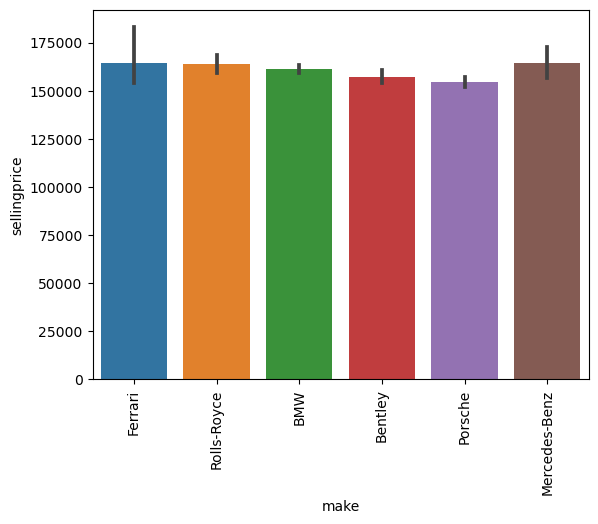

In [76]:
'top expensive car brands'
 
sns.barplot(x=top['make'],y= top['sellingprice'])
plt.xticks(rotation = 90)

In [78]:
'''EDA on used car auction gives insight on the dependency of selling price with other features. From 
the plots we can get insights on car auction business trends.'''

'EDA on used car auction gives insight on the dependency of selling price with other features. From \nthe plots we can get insights on car auction business trends.'